
Training model with hidden layers: [3, 2]


D:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Accuracy: 0.8263
Testing Accuracy:  0.7850
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sample Predictions: [0.66 0.52 0.94 0.12 0.69]

Training model with hidden layers: [6, 4]
Training Accuracy: 0.9075
Testing Accuracy:  0.8900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sample Predictions: [0.98 0.94 0.5  0.09 0.79]

Training model with hidden layers: [2, 1]
Training Accuracy: 0.7013
Testing Accuracy:  0.6750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Sample Predictions: [0.35 0.35 0.62 0.41 0.62]


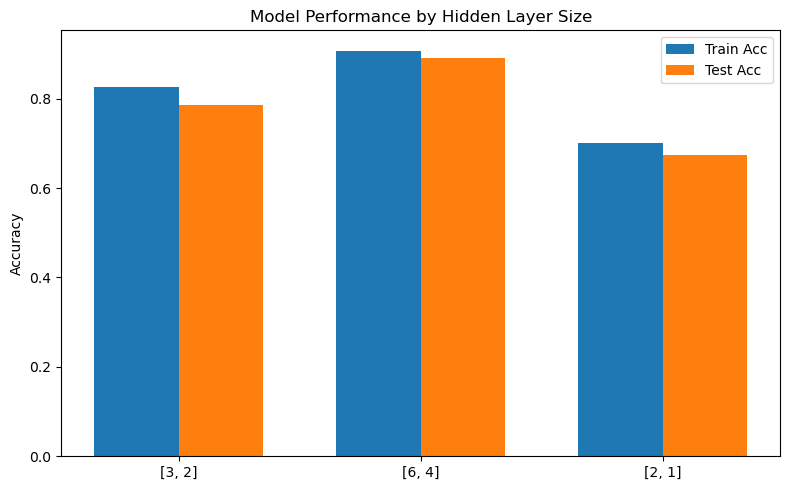

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create model with variable hidden layers
def create_model(hidden_layers, input_dim=10):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation='relu'))
    model.add(Dense(hidden_layers[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Configurations to test
configs = [[3, 2], [6, 4], [2, 1]]
results = {}

# Training and evaluation loop
for config in configs:
    print(f"\nTraining model with hidden layers: {config}")
    model = create_model(hidden_layers=config)
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")
    
    predictions = model.predict(X_test[:5])
    print("Sample Predictions:", np.round(predictions.flatten(), 2))

    # Save results for later analysis
    results[str(config)] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'predictions': predictions
    }

# Optional: plot training vs testing accuracy for comparison
labels = list(results.keys())
train_accuracies = [results[key]['train_acc'] for key in labels]
test_accuracies = [results[key]['test_acc'] for key in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, train_accuracies, width, label='Train Acc')
plt.bar(x + width/2, test_accuracies, width, label='Test Acc')
plt.ylabel('Accuracy')
plt.title('Model Performance by Hidden Layer Size')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()
